In [1]:
from pantree.panTree import panTree
from pantree.recipe import recipeDB

from pantree.domains.ba import bonAppetit
from pantree.domains.epi import epicurious
from pantree.domains.nyt import NYT
from pantree.domains.srs_eats import srsEats
from pantree.domains.food_network import foodNetwork
from pantree.domains.all_recipes import allRecipes
from pantree.domains.food52 import food52

In [2]:
db = './data/recipeDB.db'

In [3]:
r = recipeDB(db)
# r.create_table()
# r.clear()
# r.save()
# r.close()

In [4]:
r.count()

3121

In [5]:
domains =[food52(db), bonAppetit(db), epicurious(db), NYT(db), srsEats(db), allRecipes(db)]
domains=[epicurious(db),NYT(db), srsEats(db), allRecipes(db)]
for d in domains:
    d.scrape(depth = 3)
    print(d, r.count())

https://www.epicurious.com/recipes/food/views/My-Favorite-Roast-Turkey-51258050


UnboundLocalError: local variable 'results' referenced before assignment

In [4]:
r.get_ingredients()
r.serialize('./data/bank')

In [5]:
p = panTree(['flour'], pickled_recipeBank = './data/bank')
p.process()
p.rank

/Users/sabakarimeddiny/Documents/pantree-site/pantree_app/src/pantree/panTree.py:59: RuntimeWarning: invalid value encountered in true_divide
  self.must_have_mask = np.array((self.must_haves.tocsc()*self.bank.data.tocsc()).todok().todense()).flatten()/must_have_norm == 1


['https://www.allrecipes.com/recipe/8399698/two-ingredient-dough-cinnamon-rolls/',
 'https://www.allrecipes.com/recipe/9870/easy-sugar-cookies/',
 'https://www.allrecipes.com/recipe/45396/easy-pancakes/',
 'https://www.allrecipes.com/recipe/216391/easy-sausage-gravy-and-biscuits/',
 'https://www.allrecipes.com/recipe/16383/basic-crepes/',
 'https://cooking.nytimes.com/recipes/1023312-kimchi-cheddar-biscuits',
 'https://www.allrecipes.com/recipe/6865/to-die-for-blueberry-muffins/',
 'https://www.allrecipes.com/recipe/280368/grandmas-lemon-chicken/',
 'https://www.allrecipes.com/recipe/241707/joys-easy-banana-bread/',
 'https://www.allrecipes.com/recipe/238691/simple-macaroni-and-cheese/',
 'https://www.allrecipes.com/recipe/22180/waffles-i/',
 'https://www.allrecipes.com/recipe/20513/classic-waffles/',
 'https://www.allrecipes.com/recipe/20144/banana-banana-bread/',
 'https://www.allrecipes.com/recipe/10549/best-brownies/',
 'https://www.allrecipes.com/recipe/255365/edible-cookie-dough/

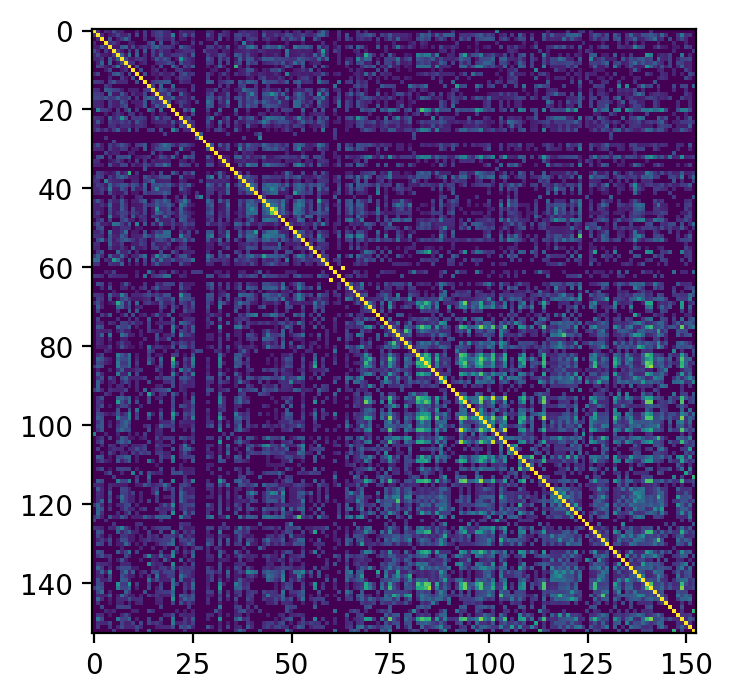

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse
plt.figure(dpi=200)
plt.imshow(np.array(p.bank.data.tocsc().T*p.bank.data.tocsc().todense())/\
           (np.matrix(scipy.sparse.linalg.norm(p.bank.data,axis=0)).T*np.matrix(scipy.sparse.linalg.norm(p.bank.data,axis=0))))